In [1]:
import os
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
import nibabel as nib

In [2]:
from dipy.viz import regtools
from dipy.align.imaffine import (AffineMap,MutualInformationMetric,AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,RigidTransform3D,AffineTransform3D)

In [4]:
moving_img = nib.load('/Users/xueminzhu/desktop/test/tests_input/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_t1w_mni.nii.gz')
template_img = nib.load('/Users/xueminzhu/desktop/test/tests_input/t1w_brain_nores.nii.gz')

In [5]:
moving_data = moving_img.get_data()
moving_affine = moving_img.affine
template_data = template_img.get_data()
template_affine = template_img.affine

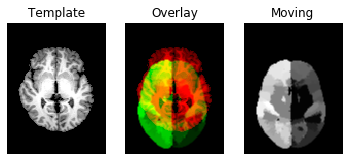

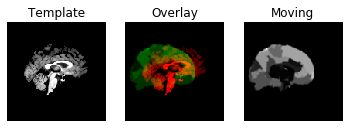

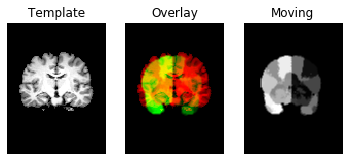

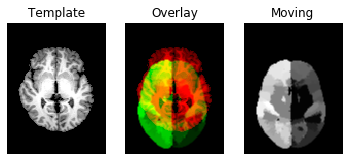

In [6]:
identity = np.eye(4)
affine_map = AffineMap(identity,template_data.shape, template_affine,moving_data.shape, moving_affine)
resampled = affine_map.transform(moving_data)
regtools.overlay_slices(template_data, resampled, None, 0,"Template", "Moving")
regtools.overlay_slices(template_data, resampled, None, 1,"Template", "Moving")
regtools.overlay_slices(template_data, resampled, None, 2,"Template", "Moving")


In [7]:
# The mismatch metric
nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)

In [8]:
# The optimization strategy
level_iters = [10, 10, 5]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]

In [9]:
affreg = AffineRegistration(metric=metric,level_iters=level_iters, sigmas=sigmas,factors=factors)

In [10]:
transform = TranslationTransform3D()
params0 = None
translation = affreg.optimize(template_data, moving_data, transform, params0,template_affine, moving_affine)

Optimizing level 2 [max iter: 10]
Optimizing level 1 [max iter: 10]
Optimizing level 0 [max iter: 5]


In [11]:
translation.affine

array([[  1.    ,   0.    ,   0.    ,  -5.8504],
       [  0.    ,   1.    ,   0.    , -30.6077],
       [  0.    ,   0.    ,   1.    ,  -1.7331],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

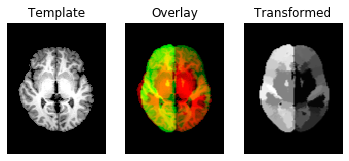

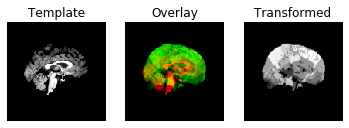

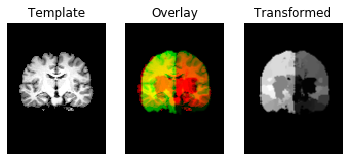

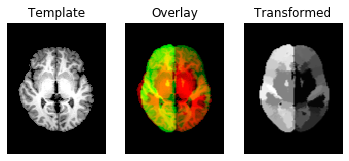

In [12]:
transformed = translation.transform(moving_data)
regtools.overlay_slices(template_data, transformed, None, 0,"Template", "Transformed")
regtools.overlay_slices(template_data, transformed, None, 1,"Template", "Transformed")
regtools.overlay_slices(template_data, transformed, None, 2,"Template", "Transformed")


In [15]:
transform = RigidTransform3D()
rigid = affreg.optimize(template_data, moving_data, transform, params0,template_affine, moving_affine,starting_affine=translation.affine)


Optimizing level 2 [max iter: 10]
Optimizing level 1 [max iter: 10]
Optimizing level 0 [max iter: 5]


In [16]:
rigid.affine

array([[  0.9995,   0.0066,   0.0315,  -6.0977],
       [ -0.0115,   0.9875,   0.1573, -30.4095],
       [ -0.03  ,  -0.1575,   0.9871,   3.1046],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

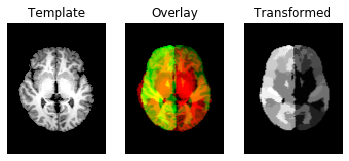

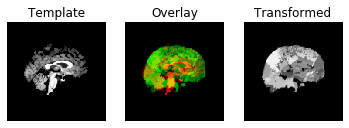

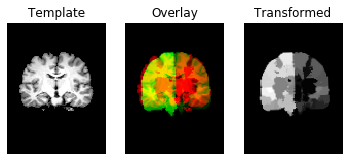

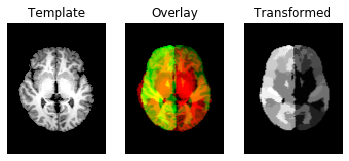

In [17]:
transformed = rigid.transform(moving_data)
regtools.overlay_slices(template_data, transformed, None, 0,"Template", "Transformed")
regtools.overlay_slices(template_data, transformed, None, 1,"Template", "Transformed")
regtools.overlay_slices(template_data, transformed, None, 2,"Template", "Transformed")

In [18]:
transform = AffineTransform3D()
# Bump up the iterations to get an more exact fit
affreg.level_iters = [1000, 1000, 100]
affine = affreg.optimize(template_data, moving_data, transform, params0,template_affine, moving_affine,starting_affine=rigid.affine)

Optimizing level 2 [max iter: 1000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


In [19]:
affine.affine

array([[  0.9551,  -0.0324,  -0.0005,  -5.4784],
       [  0.0774,   1.0103,   0.1116, -28.8511],
       [  0.0105,  -0.2301,   1.0089,   0.7969],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

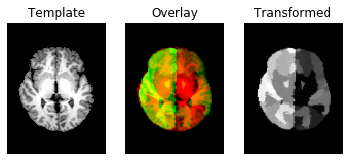

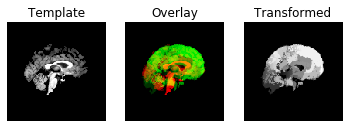

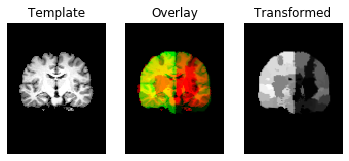

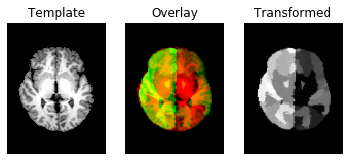

In [20]:
transformed = affine.transform(moving_data)
regtools.overlay_slices(template_data, transformed, None, 0,"Template", "Transformed")
regtools.overlay_slices(template_data, transformed, None, 1,"Template", "Transformed")
regtools.overlay_slices(template_data, transformed, None, 2,"Template", "Transformed")


In [21]:
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.imwarp import DiffeomorphicMap
from dipy.align.metrics import CCMetric

In [22]:
# The mismatch metric
metric = CCMetric(3)
# The optimization strategy:
level_iters = [10, 10, 5]
# Registration object
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)

In [23]:
mapping = sdr.optimize(template_data, moving_data, template_affine,moving_affine, affine.affine)

Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0


In [24]:
 warped_moving = mapping.transform(moving_data)

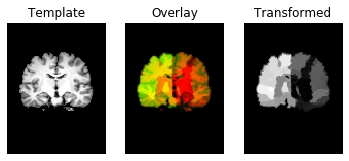

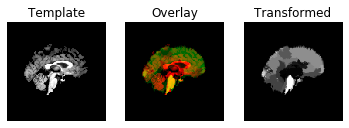

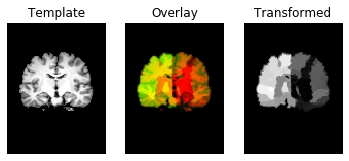

In [25]:
regtools.overlay_slices(template_data, warped_moving, None, 0,"Template", "Transformed")
regtools.overlay_slices(template_data, warped_moving, None, 1, "Template", "Transformed")
